<a href="https://colab.research.google.com/github/varunkr24/Face-Detection/blob/Python/Face_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(os.listdir('../content/drive/My Drive/AIML/Projects/CV'))

['trainimages.npy']


In [3]:
import numpy as np
images=np.load("../content/drive/My Drive/AIML/Projects/CV/trainimages.npy",allow_pickle=True)

In [4]:
print("There are {} images in the dataset".format(len(images)))

There are 409 images in the dataset


In [6]:
img_height = 224 
img_width = 224

In [5]:
import cv2
import time
from tensorflow.keras.applications.mobilenet import preprocess_input

In [12]:
masks = np.zeros((int(images.shape[0]), img_height, img_width))
X = np.zeros((int(images.shape[0]), img_height, img_width, 3))
for index in range(images.shape[0]):
  img = images[index][0]
  img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_AREA)
  try:
    img = img[:, :, :3]
  except:
    continue
  X[index] = preprocess_input(np.array(img, dtype=np.float32))
  for i in images[index][1]:
    x1 = int(i['points'][0]['x']*img_width)
    x2 = int(i['points'][1]['x']*img_width)
    y1 = int(i['points'][0]['y']*img_height)
    y2 = int(i['points'][1]['y']*img_height)
    masks[index][y1:y2,x1:x2] = 1


In [14]:
masks.shape, X.shape

((409, 224, 224), (409, 224, 224, 3))

In [9]:
!mkdir face-detection-images

In [10]:
count = 1

totalfaces = 0

start = time.time()

for image in images:
    img = image[0]
    metadata = image[1]
    for data in metadata:
        height = data['imageHeight']
        width = data['imageWidth']
        points = data['points']
        if 'Face' in data['label']:
            x1 = round(width*points[0]['x'])
            y1 = round(height*points[0]['y'])
            x2 = round(width*points[1]['x'])
            y2 = round(height*points[1]['y'])
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
            totalfaces += 1
    cv2.imwrite('./face-detection-images/face_image_{}.jpg'.format(count),img)
    count += 1
    
end = time.time()

print("Total test images with faces : {}".format(len(images)))
print("Sucessfully tested {} images".format(count-1))
print("Execution time in seconds {}".format(end-start))
print("Total Faces Detected {}".format(totalfaces))

Total test images with faces : 409
Sucessfully tested 409 images
Execution time in seconds 8.460844039916992
Total Faces Detected 1132


In [15]:
print(os.listdir('./face-detection-images/'))

['face_image_89.jpg', 'face_image_329.jpg', 'face_image_328.jpg', 'face_image_352.jpg', 'face_image_400.jpg', 'face_image_187.jpg', 'face_image_118.jpg', 'face_image_49.jpg', 'face_image_233.jpg', 'face_image_113.jpg', 'face_image_102.jpg', 'face_image_217.jpg', 'face_image_380.jpg', 'face_image_396.jpg', 'face_image_293.jpg', 'face_image_215.jpg', 'face_image_284.jpg', 'face_image_92.jpg', 'face_image_144.jpg', 'face_image_337.jpg', 'face_image_251.jpg', 'face_image_286.jpg', 'face_image_339.jpg', 'face_image_241.jpg', 'face_image_112.jpg', 'face_image_83.jpg', 'face_image_196.jpg', 'face_image_180.jpg', 'face_image_386.jpg', 'face_image_46.jpg', 'face_image_365.jpg', 'face_image_158.jpg', 'face_image_192.jpg', 'face_image_15.jpg', 'face_image_236.jpg', 'face_image_179.jpg', 'face_image_81.jpg', 'face_image_223.jpg', 'face_image_127.jpg', 'face_image_367.jpg', 'face_image_372.jpg', 'face_image_229.jpg', 'face_image_315.jpg', 'face_image_334.jpg', 'face_image_326.jpg', 'face_image_154.

In [11]:
y_images = cv2.imread('./face-detection-images/face_image_1.jpg')

In [15]:
import matplotlib.pyplot as plt

In [18]:
face1 = cv2.imread("./face-detection-images/face_image_64.jpg")

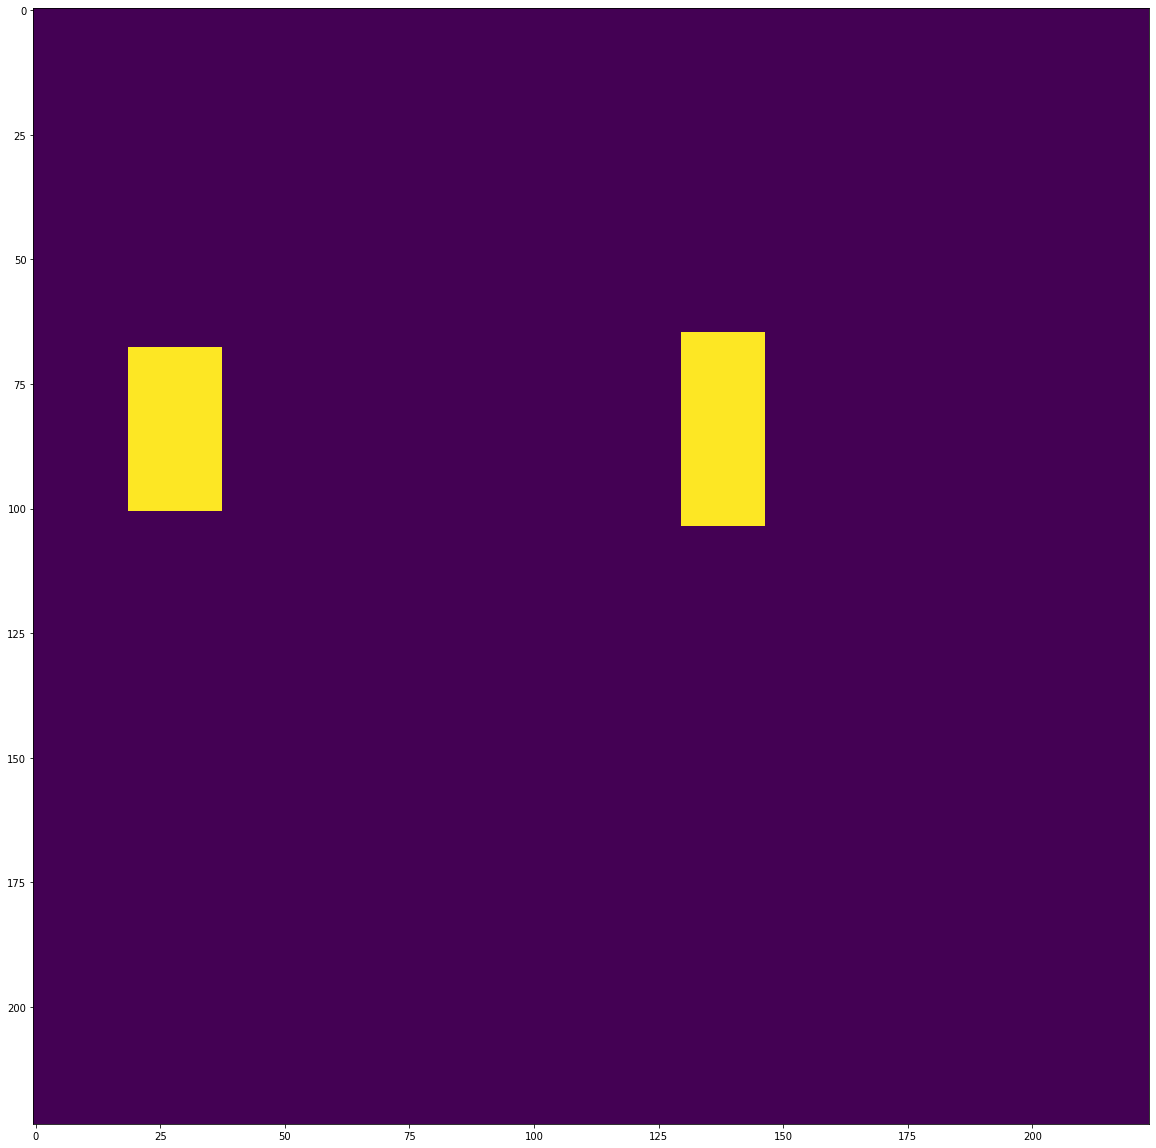

In [16]:
plt.figure(figsize=(20,25))
plt.imshow(masks[0])
plt.show()
#images.shape, face1.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


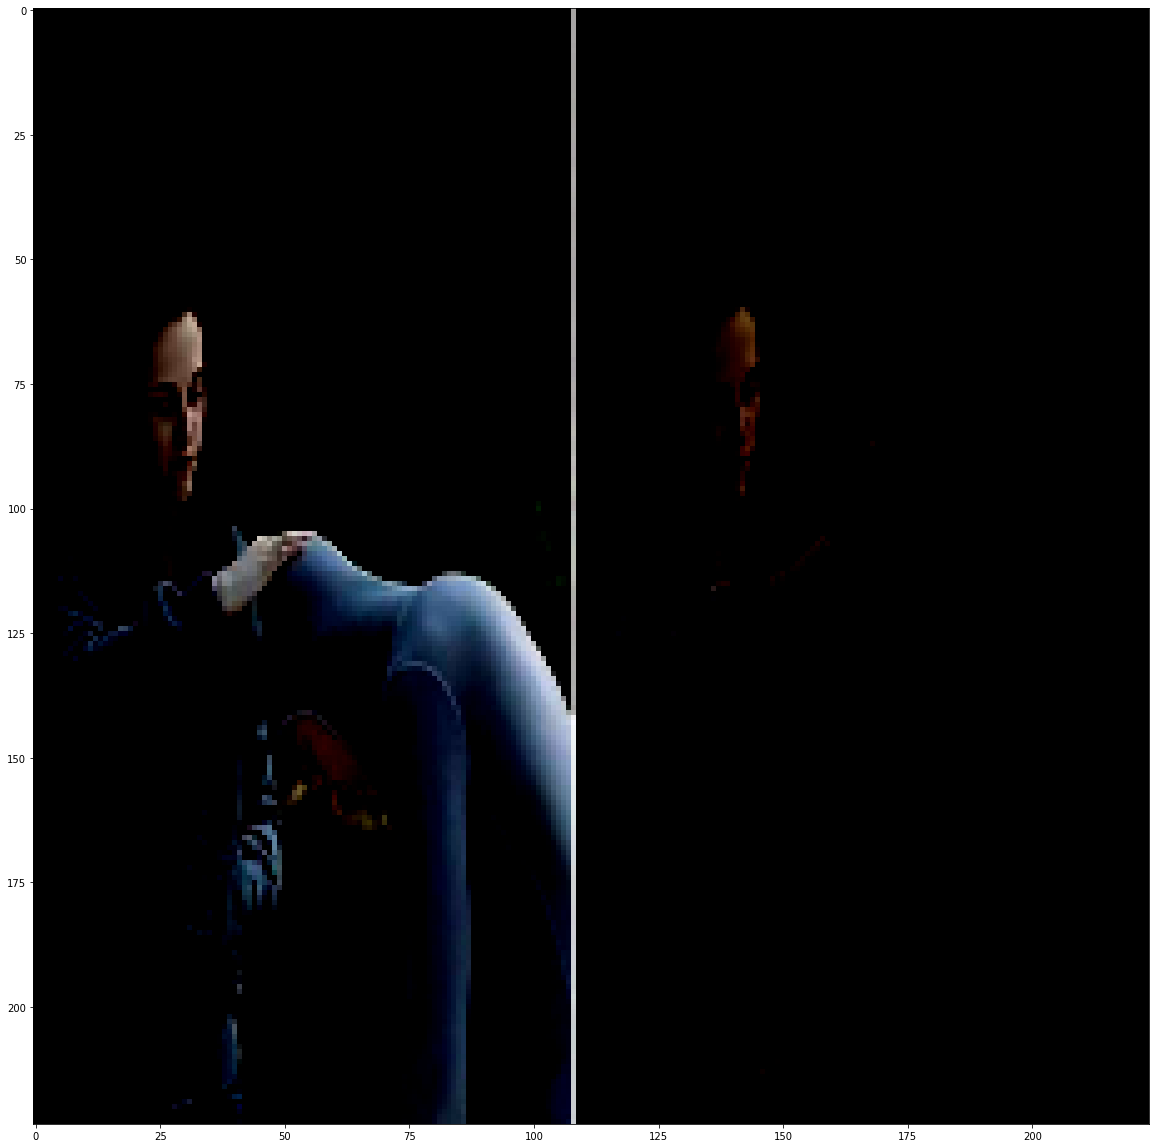

In [17]:
plt.figure(figsize=(20,25))
plt.imshow(X[0])
plt.show()

TypeError: ignored

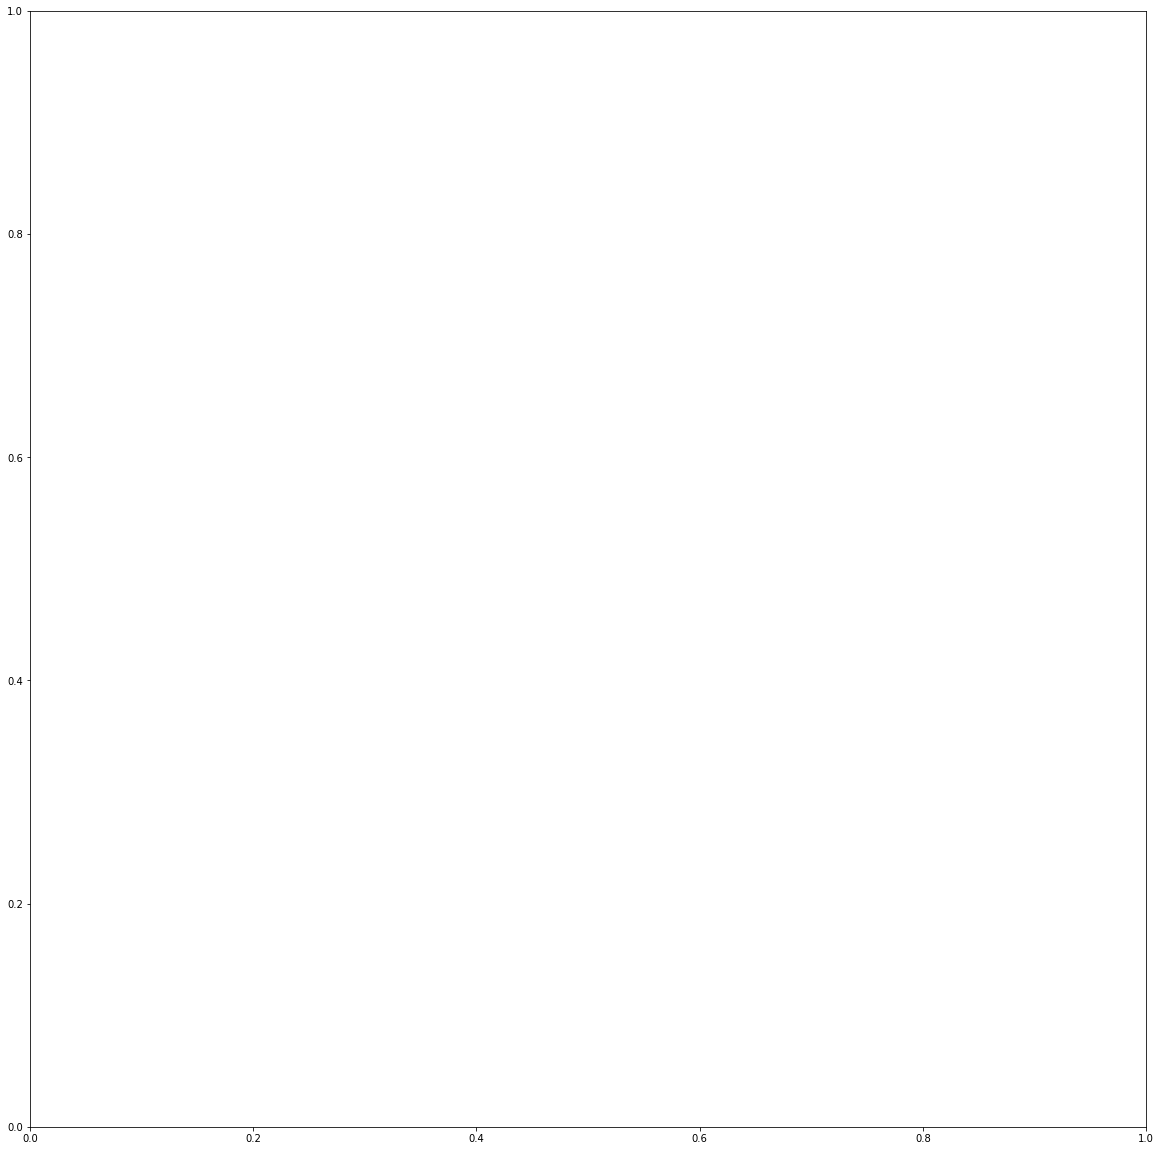

In [20]:
plt.figure(figsize=(20,25))
plt.imshow(images[0][1])
plt.show()

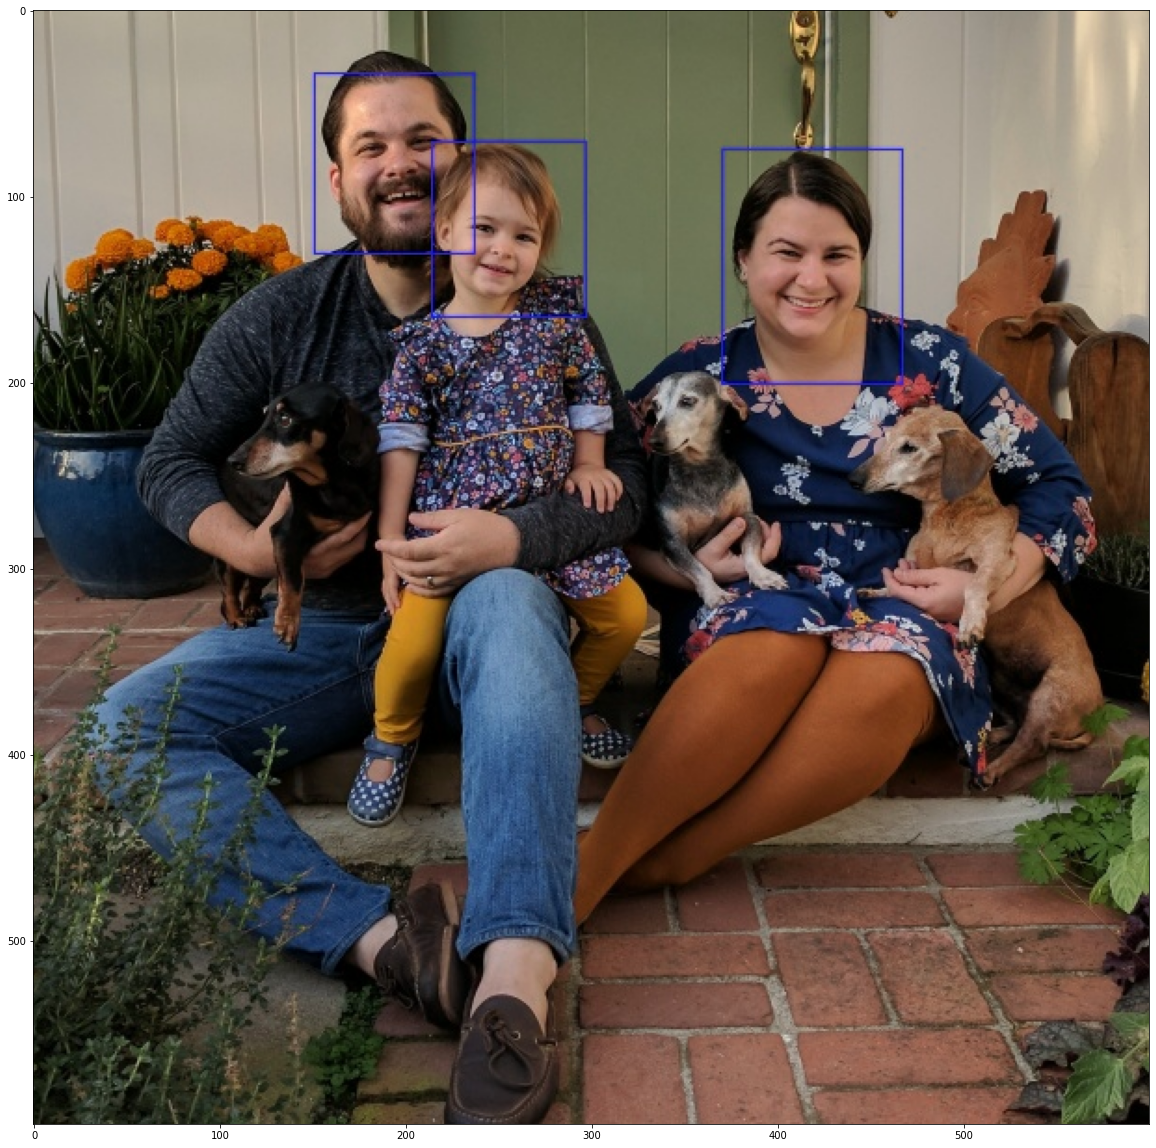

In [20]:
plt.figure(figsize=(20,25))
plt.imshow(face1)
plt.show()

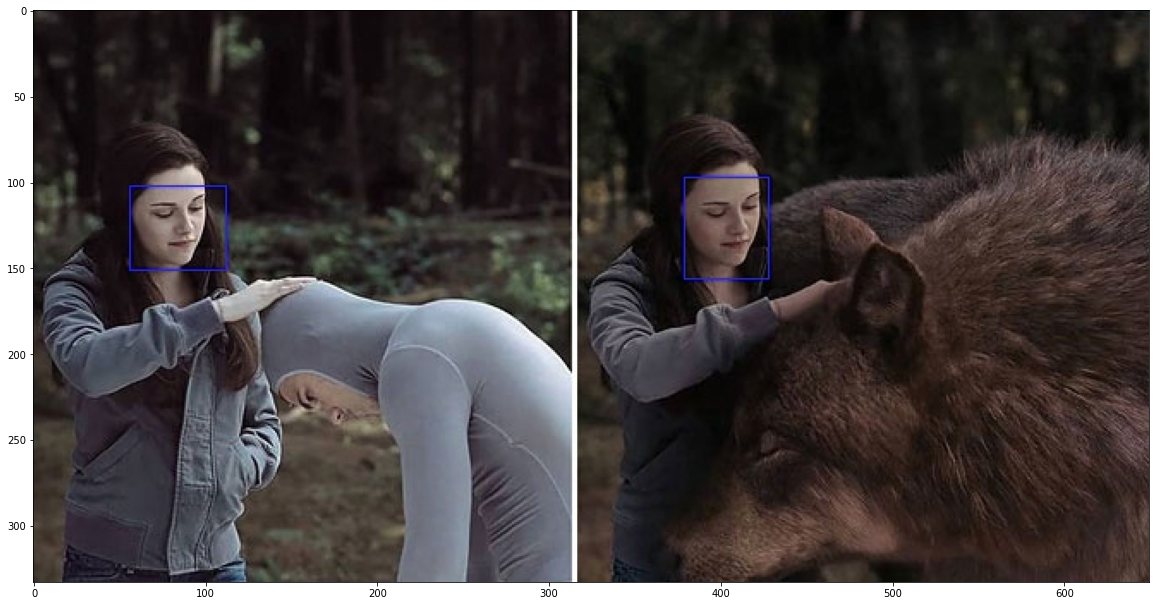

In [21]:
face2 = cv2.imread("./face-detection-images/face_image_1.jpg")
plt.figure(figsize=(20,25))
plt.imshow(face2)
plt.show()

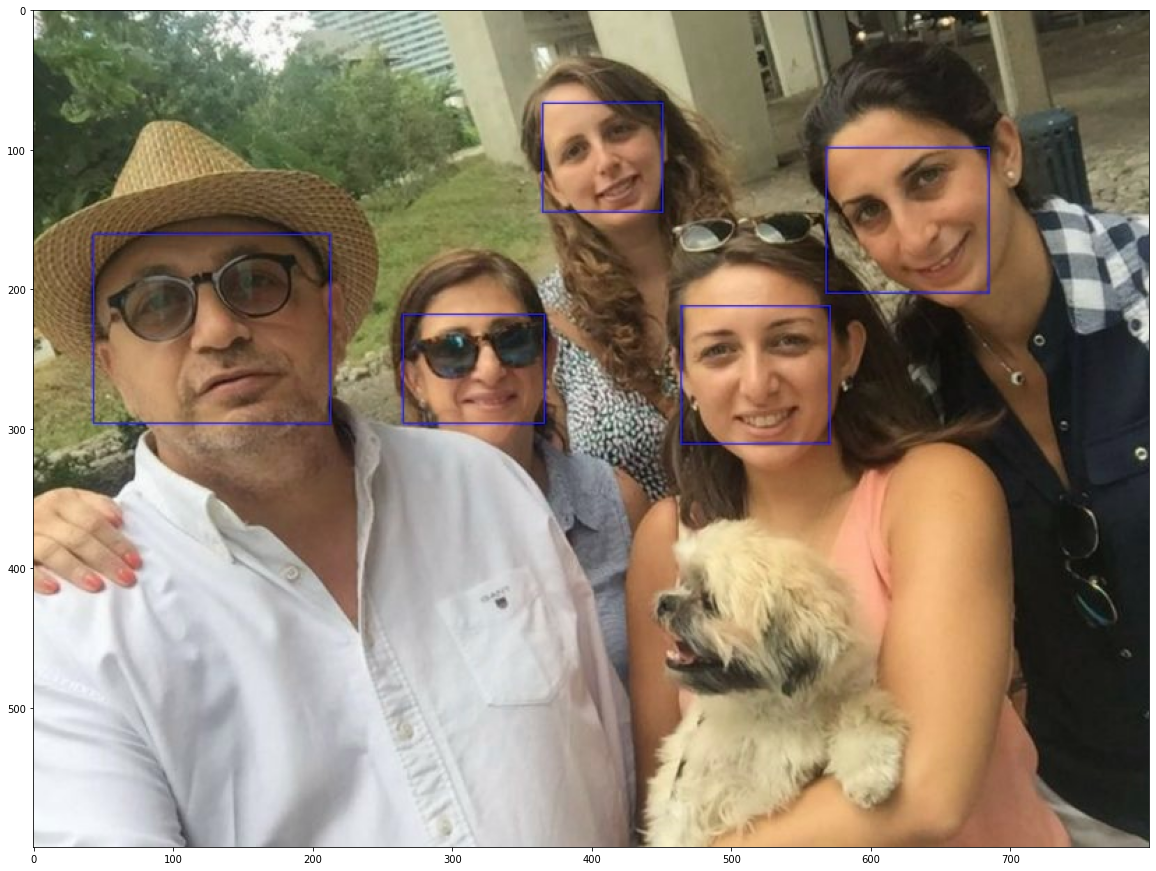

In [24]:
face3 = cv2.imread("./face-detection-images/face_image_49.jpg")
plt.figure(figsize=(20,25))
plt.imshow(face3)
plt.show()